In [1]:
using Distributions
using Plots
gr()

Plots.GRBackend()

### 事後分布の平均( $\mu$ )の推論   
$\lambda=\sigma^{-2}$

In [2]:
function training_parameter(lambda, x, lambda_mu, m)
    n = length(x)
    x_sum = sum(x)
    lambda_hat = n * lambda + lambda_mu
    m_hat = (lambda * x_sum + lambda_mu * m) / lambda_hat
    println("μ hat:", m_hat)
    println("λ hat:", lambda_hat)
    return lambda_hat, m_hat
end

function plot_predict(m_hat, sigma_hat, r)
    d = Normal(m_hat, sigma_hat)
    y = pdf.(d, r)
    plot!(r, y)
end

plot_predict (generic function with 1 method)

In [3]:
# number of data
N = 100

# true parameter
mu = 0
sigma = 1

# parameter
m = 2
lambda_mu = 1

# range
r = range(-10, stop=10, step=0.01)

# defult
d = Normal(mu, sigma)
X = rand(d, N)
print()

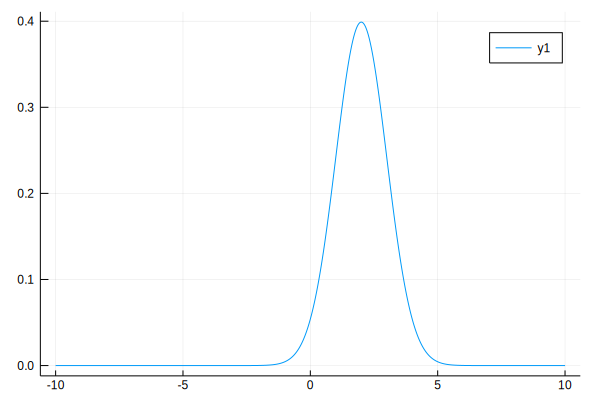

In [4]:
# no training
d = Normal(m, lambda_mu^-0.5)
y = pdf.(d, r)
plot(r, y)

μ hat:0.09440835765621554
λ hat:11.0


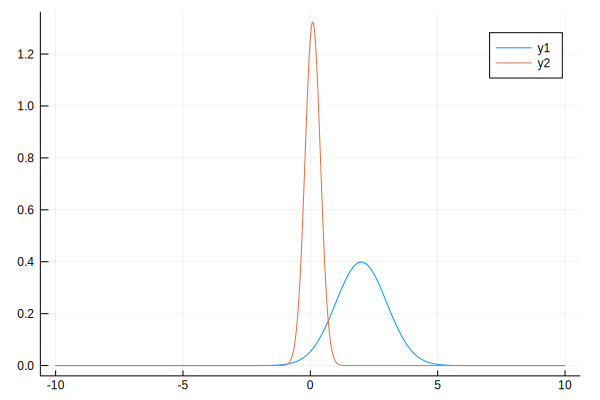

In [5]:
# N=10
lambda_hat, m_hat = training_parameter(sigma^-2, X[1:10], lambda_mu, m)
plot_predict(m_hat, lambda_hat^-0.5, r)

μ hat:0.19754788006478663
λ hat:51.0


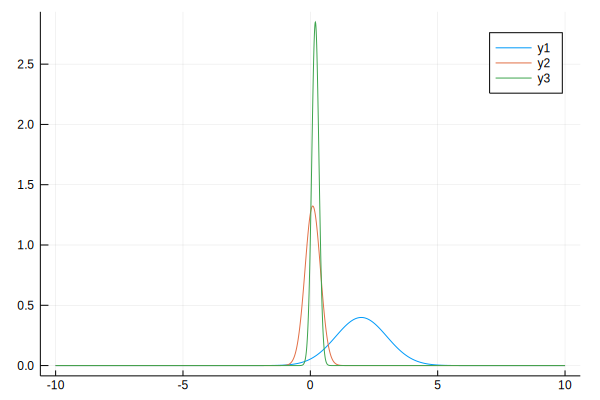

In [6]:
# N=50
lambda_hat, m_hat = training_parameter(sigma^-2, X[1:50], lambda_mu, m)
plot_predict(m_hat, lambda_hat^-0.5, r)

μ hat:0.1411969869541752
λ hat:101.0


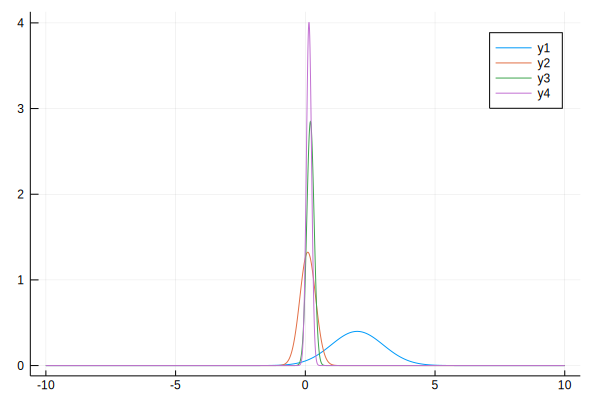

In [7]:
# N=100
lambda_hat, m_hat = training_parameter(sigma^-2, X[1:100], lambda_mu, m)
plot_predict(m_hat, lambda_hat^-0.5, r)

### 予測分布の予測

In [8]:
# μ and λ
mu_ast = m_hat
lambda_ast = (sigma^-2 * lambda_hat) / (sigma^-2 + lambda_hat)
println("μ:", mu_ast)
println("λ:", lambda_ast)

μ:0.1411969869541752
λ:0.9901960784313726


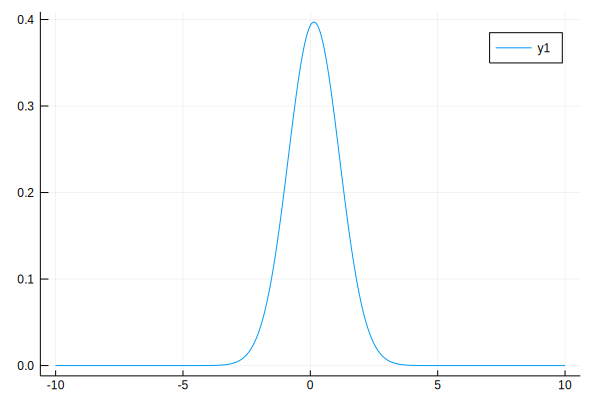

In [9]:
d = Normal(mu_ast, lambda_ast^-0.5)
y = pdf.(d, r)
plot(r, y)